   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Missing Values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


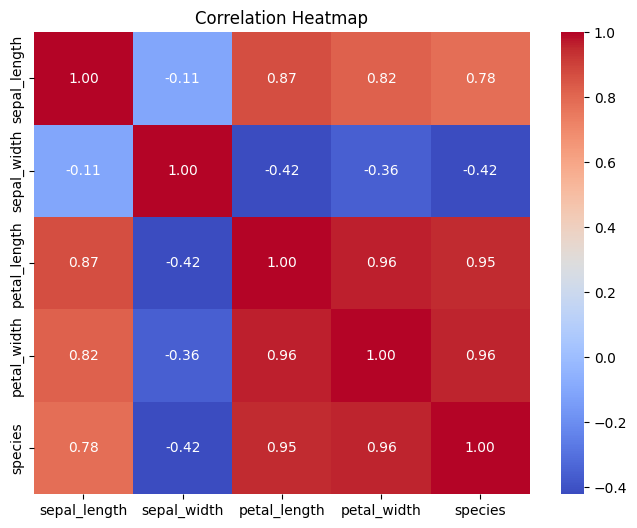

Kernel: linear, Accuracy: 0.97
Kernel: poly, Accuracy: 0.97
Kernel: rbf, Accuracy: 1.00

Classification Report (RBF Kernel):
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



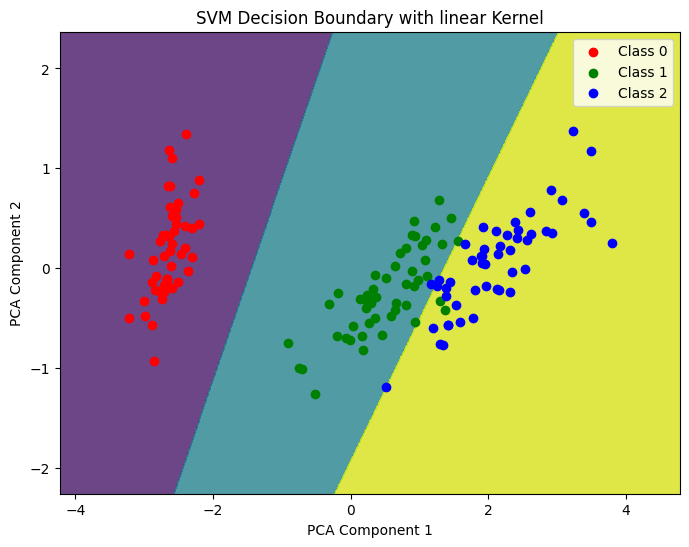

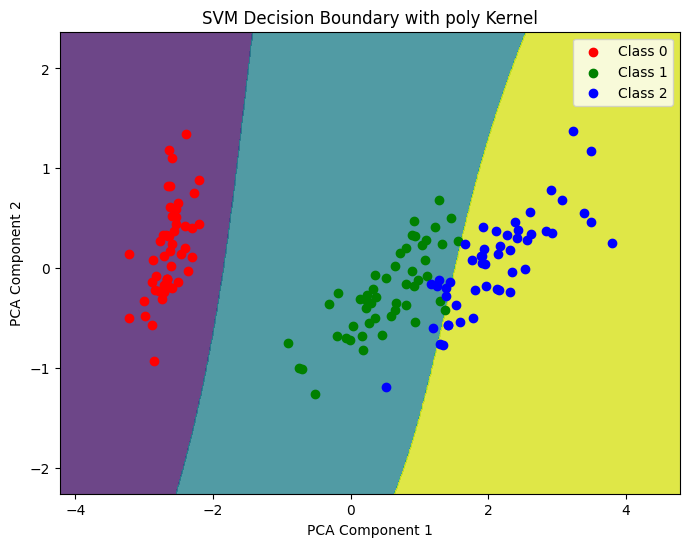

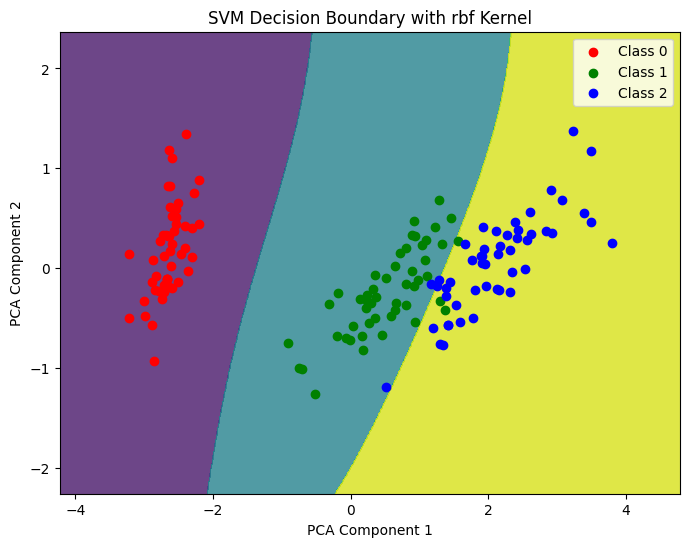


Confusion Matrix (RBF Kernel):
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


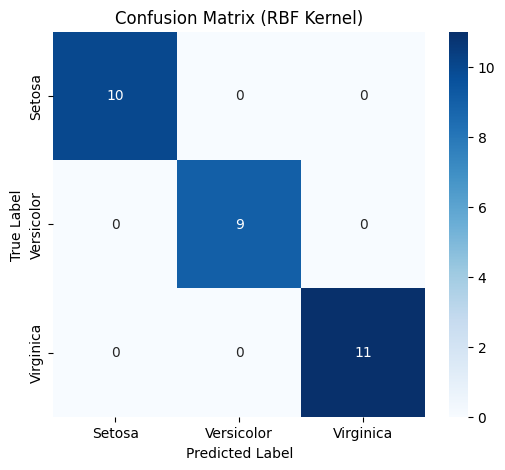

In [6]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.decomposition import PCA

# Step 1: Load the Dataset
data = pd.read_csv("iris.csv")

# Display the first few rows
print(data.head())

# Step 2: Data Preprocessing
# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())

# Encode the target species as numeric values
data['species'] = data['species'].astype('category').cat.codes

# Display correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Separate features and target
X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = data['species']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Train SVM Models with Different Kernels
kernels = ['linear', 'poly', 'rbf']
models = {}
classification_reports = {}

for kernel in kernels:
    model = SVC(kernel=kernel, C=1, random_state=42)
    model.fit(X_train, y_train)
    models[kernel] = model

    # Evaluate model
    y_pred = model.predict(X_test)
    classification_reports[kernel] = classification_report(y_test, y_pred, target_names=['Setosa', 'Versicolor', 'Virginica'])
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Kernel: {kernel}, Accuracy: {accuracy:.2f}")

# Display classification report for one model (e.g., RBF)
print("\nClassification Report (RBF Kernel):\n", classification_reports['rbf'])

# Step 4: Visualize Decision Boundaries (Using PCA for simplicity)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

for kernel in kernels:
    svc = SVC(kernel=kernel, C=1, random_state=42).fit(X_pca, y)
    plt.figure(figsize=(8, 6))
    plt.title(f"SVM Decision Boundary with {kernel} Kernel")

    # Plot decision boundary
    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)

    # Plot data points
    for i, color in zip(range(3), ['red', 'green', 'blue']):
        plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=f"Class {i}", color=color)

    plt.legend()
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

# Step 5: Confusion Matrix Visualization for RBF Kernel
y_pred_rbf = models['rbf'].predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_rbf)
print("\nConfusion Matrix (RBF Kernel):\n", conf_matrix)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt="d",
            xticklabels=['Setosa', 'Versicolor', 'Virginica'],
            yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.title("Confusion Matrix (RBF Kernel)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
